In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [69]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

In [70]:
df = pd.DataFrame(lista_alumnos, columns=['Nombre','edad','altura'])

<Axes: xlabel='edad', ylabel='altura'>

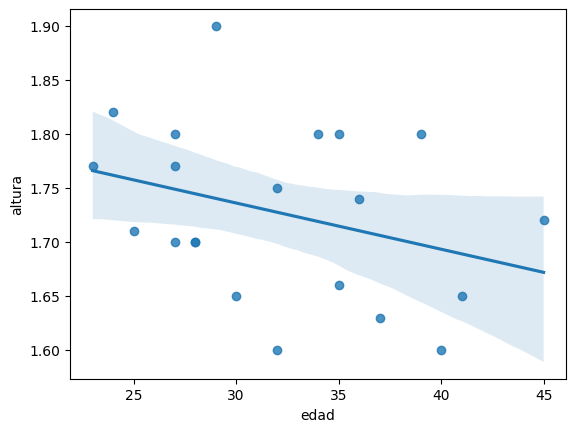

In [71]:
sns.regplot(data=df, x= 'edad', y = 'altura')

### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

In [72]:
df.corr(numeric_only=True)

,edad,altura
edad,1.000000,-0.329275
altura,-0.329275,1.000000


In [114]:
x = df[['edad']]
y = df['altura']

### Entrena un modelo de regresión lineal

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)


In [117]:
x.values

array([[24],
       [25],
       [35],
       [37],
       [29],
       [27],
       [28],
       [32],
       [36],
       [45],
       [41],
       [30],
       [40],
       [39],
       [23],
       [32],
       [27],
       [34],
       [27],
       [28],
       [35]])

In [118]:
y.values

array([1.82, 1.71, 1.66, 1.63, 1.9 , 1.8 , 1.7 , 1.6 , 1.74, 1.72, 1.65,
       1.65, 1.6 , 1.8 , 1.77, 1.75, 1.7 , 1.8 , 1.77, 1.7 , 1.8 ])

In [119]:
lm = LinearRegression()

In [120]:
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [121]:
print(lm.intercept_)

# [1.85209063]

1.8520906282183314


In [122]:
predictions = lm.predict(X_test)

In [138]:
predictions

array([1.75272915, 1.71132853, 1.71960865, 1.74858908, 1.7030484 ,
       1.74030896, 1.72788877])

In [135]:
list(y_test)

[1.82, 1.8, 1.75, 1.71, 1.74, 1.8, 1.65]

### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE.

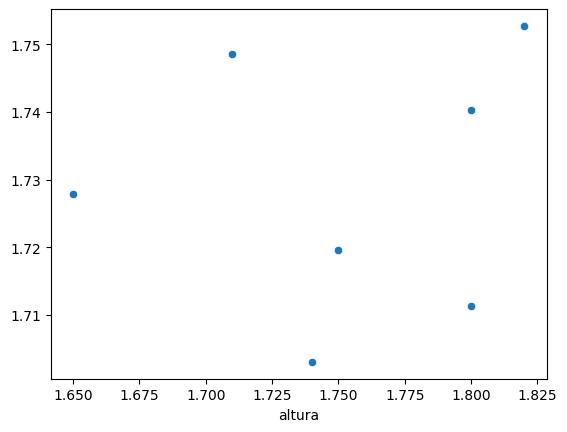

In [139]:
sns.scatterplot(x = y_test, y = predictions);

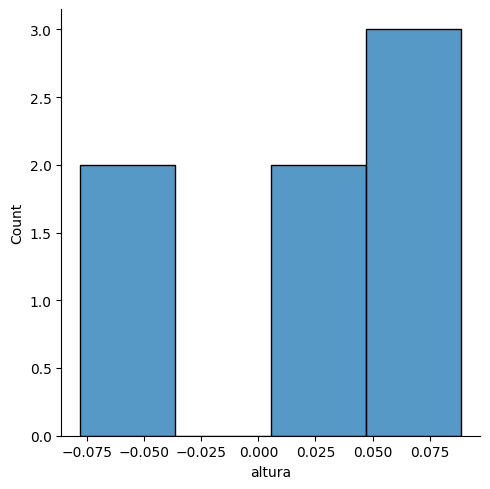

In [140]:
sns.displot((y_test - predictions));

In [144]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.05706488156539665
MSE: 0.0036851216240520687
RMSE: 0.060705202611078306
